# __Prediction of the interaction of bacteriophage proteins and the human immune system__

This notebook contains the main results of the Projeto em Bioinformática's project entitled "Prediction of the interaction of bacteriophage proteins and the human immune system".

It contains the following chapters:
1. __Human Innate Immune Receptors Search__:
    
    This chapter contains a list of some human innate immune receptors found in the literature and python classes that retrive information about the receptors (protein and gene).

2. __Phage Proteins Search__:

    This chapter contains python classes that retrieve: phages protein information in Uniprot (namely the taxonomy IDs of all phages that have reviewed records in Uniprot and corresponding proteins), and PubMed articles that relate to phages interactions with the human innate immune receptors.
    
3. __SQL Database__:

    This chapter contains a python code that connects to the database created for this project and retrives its information.

4. __Databases consulted__:

    This chapter contains all the databases consulted in this project.

## __Human Innate Immune Receptors Search__

The receptors list used in this project are in the file receptors.txt.

    class UniProtSearchImmuneReceptor

This class allows searching for and retrieving information about innate immune receptors from the UniProt database. 

In [1]:
from UniprotSearchImmuneReceptor import *

This code searches for a specific innate immune receptor in UniProt and displays the search results (entry name, entry, length, reviewed and protein names).

For example, we want to search for the records relative to the TLR1 receptor:

In [3]:
receptor = 'TLR1'
receptor_info = UniprotSearchImmuneReceptor()
receptor_info.search_receptor(receptor)

Entry Name	Entry	Length	Reviewed	Protein names
TLR1_HUMAN	Q15399	786	reviewed	Toll-like receptor 1 (Toll/interleukin-1 receptor-like protein) (TIL) (CD antigen CD281)
TLR2_HUMAN	O60603	784	reviewed	Toll-like receptor 2 (Toll/interleukin-1 receptor-like protein 4) (CD antigen CD282)
CD14_HUMAN	P08571	375	reviewed	Monocyte differentiation antigen CD14 (Myeloid cell-specific leucine-rich glycoprotein) (CD antigen CD14) [Cleaved into: Monocyte differentiation antigen CD14, urinary form; Monocyte differentiation antigen CD14, membrane-bound form]
TLR10_HUMAN	Q9BXR5	811	reviewed	Toll-like receptor 10 (CD antigen CD290)
SCIMP_HUMAN	Q6UWF3	145	reviewed	SLP adapter and CSK-interacting membrane protein (SLP65/SLP76, Csk-interacting membrane protein)
CNPY3_HUMAN	Q9BT09	278	reviewed	Protein canopy homolog 3 (CTG repeat protein 4a) (Expanded repeat-domain protein CAG/CTG 5) (Protein associated with TLR4) (Trinucleotide repeat-containing gene 5 protein)
SFPA2_HUMAN	Q8IWL1	248	reviewed	Pulmonary surf

This code downloads the information for a specific innate immune receptor using the Uniprot ID (entry) and displays the information.

For example, we want to access the information about TLR1 receptor, which has the entry 'Q15399':

In [16]:
uniprot_id = 'Q15399'
receptor_info.download_receptor_info(uniprot_id)
receptor_info.parse_receptor_info(uniprot_id)

>>TLR1_HUMAN | Homo sapiens (Human).
MTSIFHFAIIFMLILQIRIQLSEESEFLVDRSKNGLIHVPKDLSQKTTILNISQNYISELWTSDILSLSKLRILIISHNRIQYLDISVFKFNQELEYLDLSHNKLVKISCHPTVNLKHLDLSFNAFDALPICKEFGNMSQLKFLGLSTTHLEKSSVLPIAHLNISKVLLVLGETYGEKEDPEGLQDFNTESLHIVFPTNKEFHFILDVSVKTVANLELSNIKCVLEDNKCSYFLSILAKLQTNPKLSNLTLNNIETTWNSFIRILQLVWHTTVWYFSISNVKLQGQLDFRDFDYSGTSLKALSIHQVVSDVFGFPQSYIYEIFSNMNIKNFTVSGTRMVHMLCPSKISPFLHLDFSNNLLTDTVFENCGHLTELETLILQMNQLKELSKIAEMTTQMKSLQQLDISQNSVSYDEKKGDCSWTKSLLSLNMSSNILTDTIFRCLPPRIKVLDLHSNKIKSIPKQVVKLEALQELNVAFNSLTDLPGCGSFSSLSVLIIDHNSVSHPSADFFQSCQKMRSIKAGDNPFQCTCELGEFVKNIDQVSSEVLEGWPDSYKCDYPESYRGTLLKDFHMSELSCNITLLIVTIVATMLVLAVTVTSLCSYLDLPWYLRMVCQWTQTRRRARNIPLEELQRNLQFHAFISYSGHDSFWVKNELLPNLEKEGMQICLHERNFVPGKSIVENIITCIEKSYKSIFVLSPNFVQSEWCHYELYFAHHNLFHEGSNSLILILLEPIPQYSIPSSYHKLKSLMARRTYLEWPKEKSKRGLFWANLRAAINIKLTEQAKK

TAXONOMY: Eukaryota | Metazoa | Chordata | Craniata | Vertebrata | Euteleostomi | Mammalia | Eutheria | Euarchontoglires | Primates | Haplorrhini | Catarrhini | Hominidae | Ho

This code retrieves information from the NCBI Gene database. The imported dictionary *dic* maps UniProt IDs to gene IDs, and the code retrieves the gene ID corresponding to a specific UniProt ID (defined previously) and then constructs the URL to access the gene information.

In [14]:
import requests
from GeneIDs import dic

prot_id = f"{uniprot_id}"

if prot_id in dic:
    gene_id = dic[prot_id]

url = f"https://www.ncbi.nlm.nih.gov/gene/{gene_id}?report=full_report&format=text"

response = requests.get(url)
gene_info = response.text
print(gene_info)

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<pre><pre>TLR2 toll like receptor 2[Homo sapiens]
Gene ID: 7097, updated on 15-May-2023


SUMMARY
-------------------------------------------------------------------------------------------------

Official Symbol: TLR2 (provided by HGNC)
Official full name: toll like receptor 2 (provided by HGNC)
Primary source: HGNC:HGNC:11848
See related: Ensembl:ENSG00000137462; MIM:603028; AllianceGenome:HGNC:11848
Gene type: protein coding
RefSeq status: REVIEWED
Organism: Homo sapiens

Lineage: Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi; Mammalia;
Eutheria; Euarchontoglires; Primates; Haplorrhini; Catarrhini; Hominidae; Homo

Also known as: TIL4; CD282

Summary: The protein encoded by this gene is a member of the Toll-like receptor (TLR)
family which plays a fundamental role in pathogen recognition and activation of


## __Phage Proteins Search__

    class UniProtPhageTaxonomy

This class retrieves all taxonomy IDs of all phages that have reviewed records in Uniprot.

In [84]:
from UniprotPhageTaxonomy import *

In [85]:
phage_taxonomy = UniProtPhageTaxonomy()
phage_taxonomy.retrieve_taxonomy_info()

Taxon Id	Scientific name	Virus hosts
2932878	Bacillus phage SPbeta	Bacillus pumilus, Bacillus subtilis
2681611	Escherichia phage lambda	Escherichia coli
10712	Enterobacteria phage 434	Escherichia coli
10736	Bacillus phage phi3T	Bacillus subtilis
10868	Escherichia phage If1	Escherichia coli
12016	Enterobacteria phage f2	Escherichia coli
12017	Enterobacteria phage fr	Escherichia coli
31533	Enterobacteria phage RB3	Escherichia coli
66711	Escherichia phage AR1	Escherichia coli O157:H7
155148	Enterobacteria phage HK620	Escherichia coli
2681603	Escherichia phage Mu	Enterobacteriaceae
2681617	Enterobacteria phage HK97	Escherichia coli
2886926	Escherichia phage P1	Enterobacteriaceae
2905681	Escherichia phage P2	Enterobacteriaceae
2907955	Enterobacteria phage SP6	Salmonella typhimurium
2679905	Escherichia phage Phieco32	Escherichia coli
10713	Enterobacteria phage phi80	Escherichia coli
10680	Enterobacteria phage P4	Escherichia coli
12353	Escherichia phage RB69	Escherichia coli
2847073	Enterobac

    class UniProtSearchPhages

This class is designed to retrieve protein data (accession, protein name, gene names, and organism name) from the UniProt database for specified taxonomy IDs. 

In [4]:
from UniprotSearchPhages import *

In [86]:
tx_ids = phage_taxonomy
taxonomy_ids = tax_ids.split(",")
retriever = UniProtSearchPhages()
retriever.protein_data(taxonomy_ids)

Entry	Protein names	Gene Names	Organism
O64046	Probable tape measure protein (TMP) (Transglycosylase) (EC 4.2.2.n1)	yomI	Bacillus phage SPbeta (Bacillus phage SPBc2) (Bacteriophage SP-beta)
O64173	Ribonucleoside-diphosphate reductase nrdEB subunit alpha (EC 1.17.4.1) (Ribonucleotide reductase large subunit) [Cleaved into: SPBc2 bnrdE intein]	bnrdE	Bacillus phage SPbeta (Bacillus phage SPBc2) (Bacteriophage SP-beta)
O64131	SOS response-associated protein yoqW (EC 3.4.-.-)	yoqW SPBc2p119	Bacillus phage SPbeta (Bacillus phage SPBc2) (Bacteriophage SP-beta)
O64174	Ribonucleoside-diphosphate reductase subunit beta (EC 1.17.4.1) (Ribonucleotide reductase small subunit)	bnrdF yosP	Bacillus phage SPbeta (Bacillus phage SPBc2) (Bacteriophage SP-beta)
P68580	Sublancin-168-processing and transport ATP-binding protein sunT (EC 3.4.22.-) (EC 7.-.-.-)	sunT SPBc2p021	Bacillus phage SPbeta (Bacillus phage SPBc2) (Bacteriophage SP-beta)
O64076	DNA-directed RNA polymerase YonO (EC 2.7.7.6) (DNA-dependen

    class PubMedSearch

This class provides a simple interface to search and retrieve details about PubMed articles relative to interactions between phages and innate immune receptors.

For example, we want to look for articles using the keywords "TLR1 AND PHAGE":

In [4]:
from PubMedSearch import *

In [8]:
keywords = "TLR AND PHAGE"
email = "youremail" # Write your email here
search = PubMedSearch(keywords, email)
search.search()
search.fetch_details()
search.display_titles()

1) Intestinal phages interact with bacteria and are involved in human diseases.
2) Efficient Homology-Directed Repair with Circular Single-Stranded DNA Donors.
3) Bacteriophage and the Innate Immune System: Access and Signaling.
4) Therapeutic potential of phages in autoimmune liver diseases.
5) The DNases of pathogenic Lancefield streptococci.
6) Cutting edge: IL-21 and TLR signaling regulate germinal center responses in a B cell-intrinsic manner.
7) Leprosy pathogenetic background: a review and lessons from other mycobacterial diseases.
8) Computational-Driven Epitope Verification and Affinity Maturation of TLR4-Targeting Antibodies.
9) Immunological basis of M13 phage vaccine: Regulation under MyD88 and TLR9 signaling.
10) Respiratory virome profiles reflect antiviral immune responses.
11) Synthetic Toll like receptor-4 (TLR-4) agonist peptides as a novel class of adjuvants.
12) Imbalance of the intestinal virome and altered viral-bacterial interactions caused by a conditional delet

This code retrieves the abstract of a chosen article. 

For example, we want to read the abstract of the first paper in the previous output:

In [7]:
n = 1
abstract = search.get_abstract(n)
print(abstract)
#print(search.get_paper_details(n))
#search.open_url(n)

EMBL-EBI The European Bioinformatics Institute; E. coli Escherichia coli; E. faecalis Enterobacter faecalis; B. fragilis Bacteroides fragilis; B. vulgatus Bacteroides vulgatus; SaPIs Staphylococcus aureus pathogenicity islands; ARGs Antibiotic resistance genes; STEC Shiga toxigenic E. coli; Stx Shiga toxin; BLAST Basic Local Alignment Search Tool; TSST-1 Toxic shock toxin 1; RBPs Receptor-binding proteins; LPS lipopolysaccharide; OMVs Outer membrane vesicles; PT Phosphorothioate; BREX Bacteriophage exclusion; OCR Overcome classical restriction; Pgl Phage growth limitation; DISARM Defense island system associated with restrictionmodification; R-M system Restriction-modification system; BREX system Bacteriophage exclusion system; CRISPR Clustered regularly interspaced short palindromic repeats; Cas CRISPR-associated; PAMs Prospacer adjacent motifs; crRNA CRISPR RNA; SIE; OMPs; Superinfection exclusion; Outer membrane proteins; Abi Abortive infection; TA Toxin-antitoxin; TLR Toll-like rec

## __SQL Database__

ER Diagram:

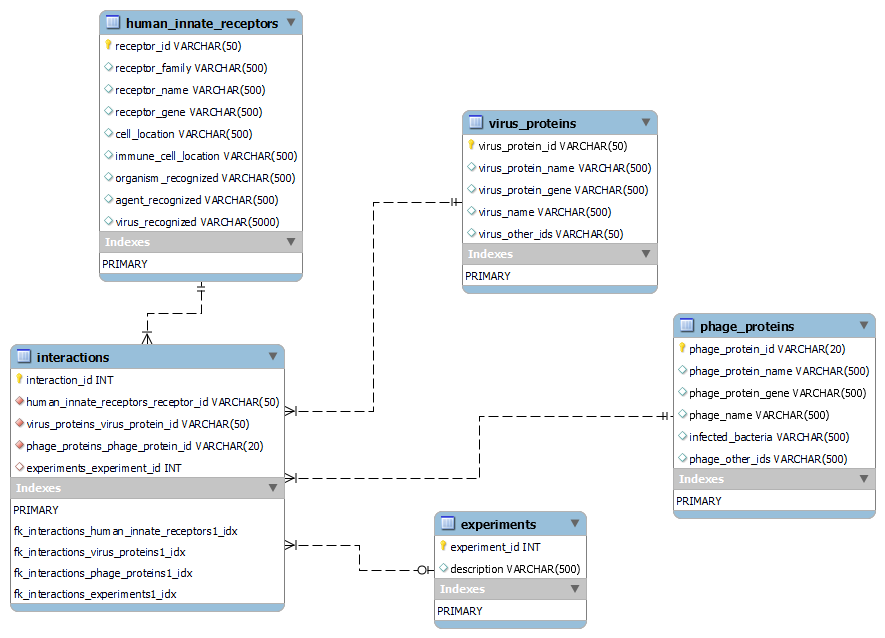

The provided code connects to a MySQL database using the mysql.connector module, executes a SELECT query to retrieve data from the "interactions" table, and prints the fetched results. Finally, it commits the changes, closes the cursor, and closes the database connection.

The table names available are:

- __human_innate_receptors__ - table with all the human innate immune receptors and respective information (ID, family, name, gene name, cell location, immune cell location, organism recognized, agents rcognized, virus recognized)

- __virus_proteins__ - table with all the viral proteins recognized by the innate immune receptors and respective information (ID, name, gene name, organism name, other IDs)

- __phage_proteins__ - table with all the phages proteins that have a record in UniProt and respective information (ID, name, gene name, organism name, infected bacteria, other IDs)

- __experiments__ - table with the interaction type between proteins (ID, description)

- __interactions__ - table with the interactions between proteins (ID, human innate immune receptor ID, viral protein ID, phage protein ID, experiment ID) (it only has information for BLASTp similarity between viral and phages proteins). The information in this table is based on the fact that similar proteins have similar interactions.

In [37]:
import mysql.connector
from tabulate import tabulate
import textwrap

db_projetobioinf = mysql.connector.connect(
  host="localhost",
  port ="3604",
  user="root",
  password="yourpassword", # Write your password here
  database="projetobioinf"
)

cursor = db_projetobioinf.cursor()

table = input("Which SQL table are you looking for?")

cursor.execute(f"SELECT * FROM {table}")
proteins = cursor.fetchall()

# Get the column names from the cursor description
if table == 'human_innate_receptors':
    column_names = ["Human Innate Immune Receptor ID", "Family", "Name", "Gene Name", "Cell Location", "Immune Cell Location", "Organism Recognized", "Agents Recognized", "Virus Recognized"]
elif table == 'virus_proteins':
    column_names = ["Protein ID", "Name", "Gene Name", "Organism Name", "Other IDs"]
elif table == 'phage_proteins':
    column_names = ["Protein ID", "Name", "Gene Name", "Organism Name", "Infected Bacteria", "Other IDs"]
elif table == 'experiments':
    column_names = ["Experiment ID", "Description"]
elif table == 'interactions':
    column_names = ["Interaction ID", "Human Innate Immune Receptor ID", "Viral Protein ID", "Phage Protein ID", "Experiment ID"]

# Format the text to wrap within the table
formatted_proteins = []
for protein in proteins:
    formatted_row = []
    for value in protein:
        formatted_value = "\n".join(textwrap.wrap(str(value), width=20))
        formatted_row.append(formatted_value)
    formatted_proteins.append(formatted_row)

# Print the table 
print(tabulate(formatted_proteins, headers=column_names, tablefmt="grid"))

Which SQL table are you looking for? interactions


+------------------+-----------------------------------+--------------------+--------------------+-----------------+
|   Interaction ID | Human Innate Immune Receptor ID   | Viral Protein ID   | Phage Protein ID   |   Experiment ID |
+==================+===================================+====================+====================+=================+
|                1 | P33076                            | P04585             | P25476             |               1 |
+------------------+-----------------------------------+--------------------+--------------------+-----------------+
|                2 | P33076                            | P04585             | P34081             |               1 |
+------------------+-----------------------------------+--------------------+--------------------+-----------------+
|                3 | P33076                            | P04585             | O48414             |               1 |
+------------------+-----------------------------------+--------

This code joins the tables human_innate_receptors, phage_proteins and interactions to show more information about the phage and innate receptor proteins that may have an interaction.

In [78]:
db_projetobioinf = mysql.connector.connect(
  host="localhost",
  port ="3604",
  user="root",
  password="yourpassword", # Write your password here
  database="projetobioinf"
)

cursor = db_projetobioinf.cursor()
cursor.execute("SELECT pp.phage_protein_name, pp.phage_name, hir.receptor_name, hir.receptor_gene, pp.phage_protein_id, hir.receptor_id FROM phage_proteins pp JOIN interactions i ON pp.phage_protein_id = i.phage_proteins_phage_protein_id JOIN human_innate_receptors hir ON hir.receptor_id = i.human_innate_receptors_receptor_id;")
info_interactions = cursor.fetchall()

column_names = ["Phage Protein Name", "Phage Name", "Human Innate Immune Receptor Name", "Human Innate Immune Receptor Gene Name", "Phage Protein ID", "Human Innate Immune Receptor ID"]

# Format the text to wrap within the table
formatted_info = []
for info in info_interactions:
    formatted_row = []
    for value in info:
        formatted_value = "\n".join(textwrap.wrap(str(value), width=20))
        formatted_row.append(formatted_value)
    formatted_info.append(formatted_row)

# Print the table 
print(tabulate(formatted_info, headers=column_names, tablefmt="grid"))

+----------------------+----------------------+-------------------------------------+------------------------------------------+--------------------+-----------------------------------+
| Phage Protein Name   | Phage Name           | Human Innate Immune Receptor Name   | Human Innate Immune Receptor Gene Name   | Phage Protein ID   | Human Innate Immune Receptor ID   |
+======================+======================+=====================================+==========================================+====================+===================================+
| Terminase,           | Escherichia phage P2 | MHC class II                        | CIITA                                    | P25476             | P33076                            |
| endonuclease subunit | (Bacteriophage P2)   | transactivator                      |                                          |                    |                                   |
| (GpM)                |                      |                       

This code closes the connection to the database.

In [53]:
db_projetobioinf.commit()  # Commit changes
cursor.close()  # Close cursor
db_projetobioinf.close()  # Close connection

## __Databases consulted__

BioGrid - https://thebiogrid.org/

IntAct - https://www.ebi.ac.uk/intact/

UniProt - https://www.uniprot.org/

NCBI Gene - https://www.ncbi.nlm.nih.gov/gene

NCBI Protein - https://www.ncbi.nlm.nih.gov/protein

NCBI PubMed - https://pubmed.ncbi.nlm.nih.gov/

The Human Protein Atlas - https://www.proteinatlas.org/

BLASTp - https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE=Proteins